### Data Explore Exercises

Do your work for this exercise in a file named `explore`.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk

plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-darkgrid')

1. Spam Data

    a. Load the spam data set.
    
    b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    
    c. Is there any overlap in the bigrams for the spam data and the ham data?
    
    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [5]:
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [18]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [20]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [21]:
# spam data bigrams
list(nltk.bigrams(spam_words.split()))

[('free', 'entry'),
 ('entry', 'in'),
 ('in', '2'),
 ('2', 'a'),
 ('a', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'to'),
 ('to', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', 'to'),
 ('to', '87121'),
 ('87121', 'to'),
 ('to', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetcs'),
 ('ratetcs', 'apply'),
 ('apply', '08452810075over18s'),
 ('08452810075over18s', 'freemsg'),
 ('freemsg', 'hey'),
 ('hey', 'there'),
 ('there', 'darling'),
 ('darling', 'its'),
 ('its', 'been'),
 ('been', '3'),
 ('3', 'weeks'),
 ('weeks', 'now'),
 ('now', 'and'),
 ('and', 'no'),
 ('no', 'word'),
 ('word', 'back'),
 ('back', 'id'),
 ('id', 'like'),
 ('like', 'some'),
 ('some', 'fun'),
 ('fun', 'you'),
 ('you', 'up'),
 ('up', 'for'),
 ('for', 'it'),
 ('it', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 (

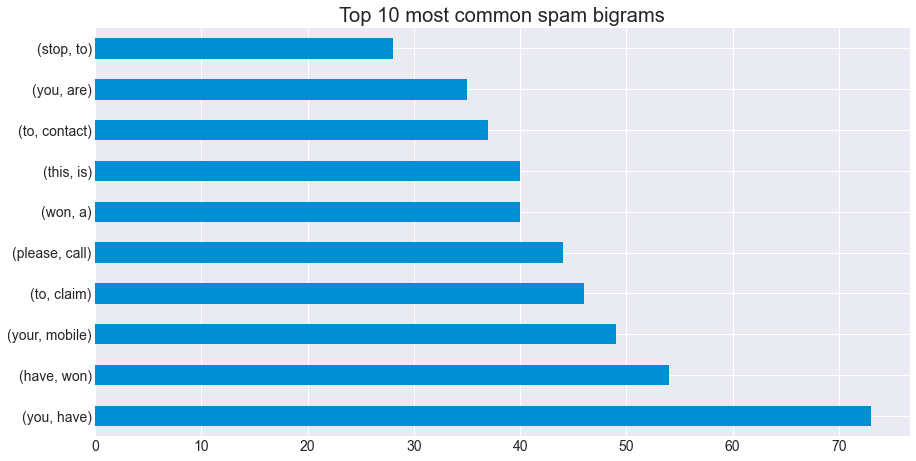

In [30]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams');

(-0.5, 999.5, 999.5, -0.5)

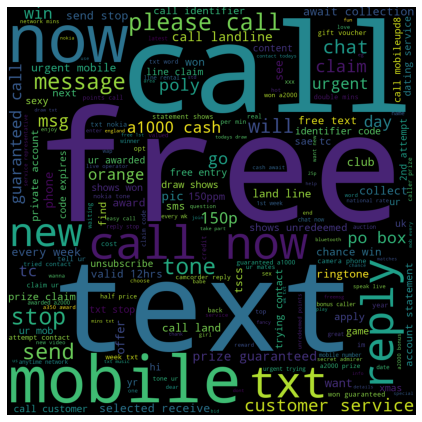

In [31]:
from wordcloud import WordCloud
img = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(spam_words)
plt.imshow(img)
plt.axis('off')

In [32]:
# ham data bigrams
list(nltk.bigrams(ham_words.split()))

[('go', 'until'),
 ('until', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'only'),
 ('only', 'in'),
 ('in', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'there'),
 ('there', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni'),
 ('oni', 'u'),
 ('u', 'dun'),
 ('dun', 'say'),
 ('say', 'so'),
 ('so', 'early'),
 ('early', 'hor'),
 ('hor', 'u'),
 ('u', 'c'),
 ('c', 'already'),
 ('already', 'then'),
 ('then', 'say'),
 ('say', 'nah'),
 ('nah', 'i'),
 ('i', 'dont'),
 ('dont', 'think'),
 ('think', 'he'),
 ('he', 'goes'),
 ('goes', 'to'),
 ('to', 'usf'),
 ('usf', 'he'),
 ('he', 'lives'),
 ('lives', 'around'),
 ('around', 'here'),
 ('here', 'though'),
 ('though', 'even'),
 ('even', 'my'),
 ('my', 'brother'),
 ('brother', 'is'),
 ('is', 'not'),
 ('not', 'lik

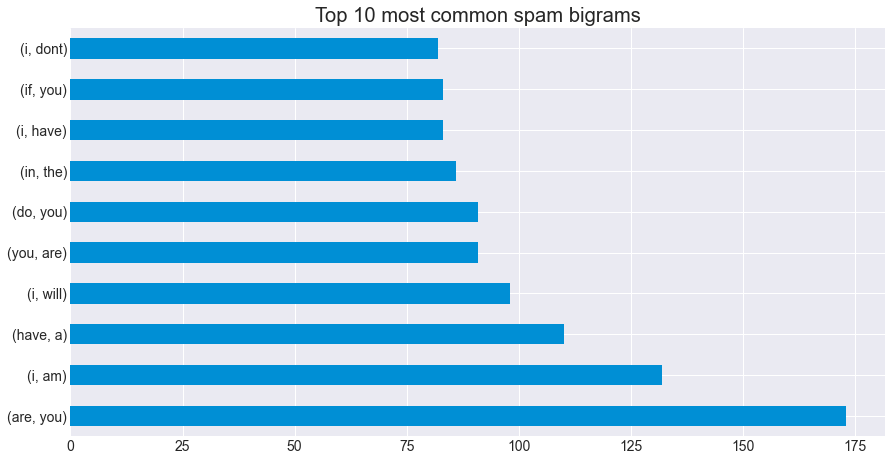

In [33]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams');

(-0.5, 999.5, 999.5, -0.5)

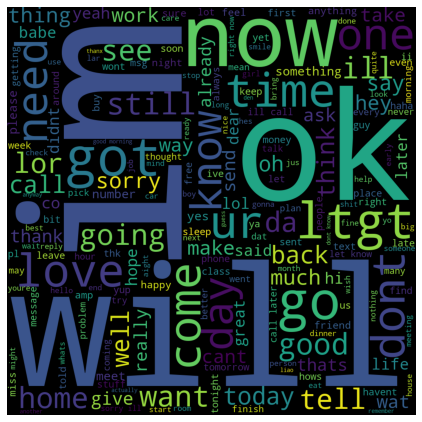

In [34]:
from wordcloud import WordCloud
img = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(ham_words)
plt.imshow(img)
plt.axis('off')

In [37]:
# spam data trigrams
list(nltk.trigrams(spam_words.split()))

[('free', 'entry', 'in'),
 ('entry', 'in', '2'),
 ('in', '2', 'a'),
 ('2', 'a', 'wkly'),
 ('a', 'wkly', 'comp'),
 ('wkly', 'comp', 'to'),
 ('comp', 'to', 'win'),
 ('to', 'win', 'fa'),
 ('win', 'fa', 'cup'),
 ('fa', 'cup', 'final'),
 ('cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'may'),
 ('21st', 'may', '2005'),
 ('may', '2005', 'text'),
 ('2005', 'text', 'fa'),
 ('text', 'fa', 'to'),
 ('fa', 'to', '87121'),
 ('to', '87121', 'to'),
 ('87121', 'to', 'receive'),
 ('to', 'receive', 'entry'),
 ('receive', 'entry', 'questionstd'),
 ('entry', 'questionstd', 'txt'),
 ('questionstd', 'txt', 'ratetcs'),
 ('txt', 'ratetcs', 'apply'),
 ('ratetcs', 'apply', '08452810075over18s'),
 ('apply', '08452810075over18s', 'freemsg'),
 ('08452810075over18s', 'freemsg', 'hey'),
 ('freemsg', 'hey', 'there'),
 ('hey', 'there', 'darling'),
 ('there', 'darling', 'its'),
 ('darling', 'its', 'been'),
 ('its', 'been', '3'),
 ('been', '3', 'weeks'),
 ('3', 'weeks', 'now'),
 ('weeks', 'now', '

In [36]:
# ham data trigrams
list(nltk.trigrams(ham_words.split()))

[('go', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'only'),
 ('available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'there'),
 ('cine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', 'u'),
 ('oni', 'u', 'dun'),
 ('u', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor'),
 ('early', 'hor', 'u'),
 ('hor', 'u', 'c'),
 ('u', 'c', 'already'),
 ('c', 'already', 'then'),
 ('already', 'then', 'say'),
 ('then', 'say', 'nah'),
 ('say', 'nah', 'i'),
 ('nah', 'i', 'dont'),
 ('i', 'dont', 'think'

2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.